# Notes służący do analizy danych, tworzenia wykresów etc.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import graph as gu
import tabu


In [4]:
connections = pd.read_csv("connection_graph.csv", low_memory=False)
connections.head()

,Unnamed: 0,company,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon
0,0,MPK Autobusy,A,20:52:00,20:53:00,Zajezdnia Obornicka,Paprotna,51.148737,17.021069,51.147752,17.020539
1,1,MPK Autobusy,A,20:53:00,20:54:00,Paprotna,Obornicka (Wołowska),51.147752,17.020539,51.144385,17.023735
2,2,MPK Autobusy,A,20:54:00,20:55:00,Obornicka (Wołowska),Bezpieczna,51.144385,17.023735,51.141360,17.026376
3,3,MPK Autobusy,A,20:55:00,20:57:00,Bezpieczna,Bałtycka,51.141360,17.026376,51.136632,17.030617
4,4,MPK Autobusy,A,20:57:00,20:59:00,Bałtycka,Broniewskiego,51.136632,17.030617,51.135851,17.037383


In [5]:
%load_ext autoreload
%autoreload 2

In [259]:
graph = gu.Graph('connection_graph.csv')

Wybór skali dla A*

In [7]:
from graph_benchmark import *

In [85]:
test_data  = get_test_data(graph, 20)
results = {}
for i in range(10, 1500, 10):
    graph.cost_estimation_scale = i
    results[i] = graph_benchmark_silent(graph.a_star, test_data)

print(results)

{10: (40.33703136444092, 2.016851568222046, 4305.0), 20: (38.26424288749695, 1.9132121443748473, 4305.0), 30: (37.42507457733154, 1.8712537288665771, 4305.0), 40: (36.210001707077026, 1.8105000853538513, 4305.0), 50: (35.128032207489014, 1.7564016103744506, 4305.0), 60: (34.06002926826477, 1.7030014634132384, 4305.0), 70: (33.115967750549316, 1.6557983875274658, 4305.0), 80: (31.81203293800354, 1.590601646900177, 4305.0), 90: (30.668968677520752, 1.5334484338760377, 4305.0), 100: (29.804999828338623, 1.4902499914169312, 4305.0), 110: (28.704999685287476, 1.4352499842643738, 4305.0), 120: (27.88203191757202, 1.3941015958786012, 4305.0), 130: (29.180000066757202, 1.45900000333786, 4305.0), 140: (25.877970218658447, 1.2938985109329224, 4305.0), 150: (24.861999034881592, 1.2430999517440795, 4305.0), 160: (24.130022048950195, 1.2065011024475099, 4305.0), 170: (23.57800602912903, 1.1789003014564514, 4305.0), 180: (22.908973932266235, 1.1454486966133117, 4305.0), 190: (24.438733339309692, 1.2

In [137]:
err = 0
for test in test_data:
    s = graph.dijkstra(*test)
    if not s[0]:
        print(f"not found for {test}")
        err+=1
err

not found for (Wysoka 17.012733429090908 51.04617267636364, Mirków - Kiełczowska (na wys. nr 14) 17.16686974 51.160663340000006, Timestamp(time_str='19:02:00', time=68520))
not found for (Kadłub NŻ 16.70455711111111 51.18300655555556, Solskiego 16.96818504878136 51.081494779354834, Timestamp(time_str='21:50:00', time=78600))


2

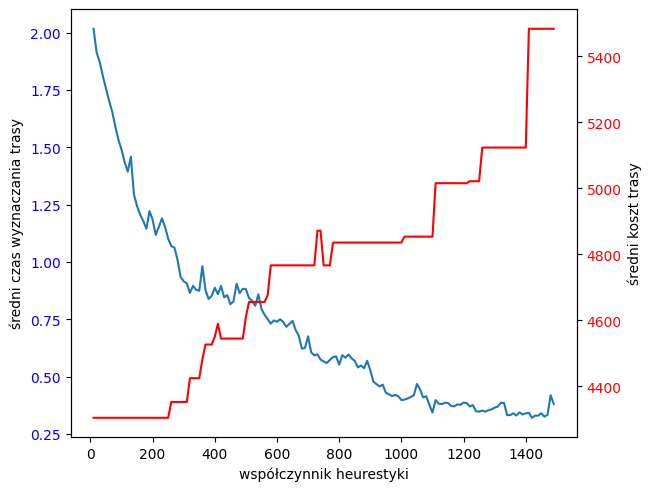

In [101]:
weight = []
avg_t = []
avg_cost = []
for k, v in results.items():
    weight.append(k)
    avg_t.append(v[1])
    avg_cost.append(v[2])

fig, ax1 = plt.subplots(layout='constrained')
ax1.plot(weight, avg_t)
ax1.set_xlabel('współczynnik heurestyki')
ax1.set_ylabel('średni czas wyznaczania trasy')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(weight, avg_cost, c='red')
ax2.set_ylabel('średni koszt trasy')
ax2.tick_params(axis='y', labelcolor='red')

In [112]:
min([c for c in zip(avg_cost, weight, avg_t) if c[0] <= 1.15 * min(avg_cost)], key=lambda x: x[2])

(4854.0, 1100, 0.34375001192092897)

In [136]:
min(avg_cost)

4305.0

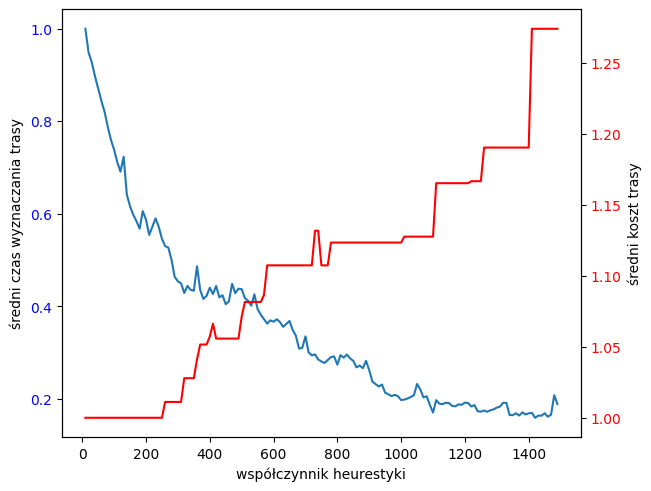

In [108]:
fig, ax1 = plt.subplots(layout='constrained')
ax1.plot(weight, [t/max(avg_t) for t in avg_t])
ax1.set_xlabel('współczynnik heurestyki')
ax1.set_ylabel('średni czas wyznaczania trasy')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.set_ylabel('średni koszt trasy')
ax2.plot(weight, [c/min(avg_cost) for c in avg_cost], color='red')
ax2.tick_params(axis='y', labelcolor='red')

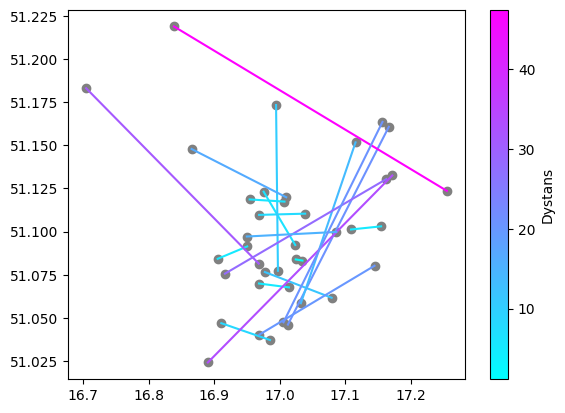

In [138]:
import matplotlib.cm as cm
fig, ax = plt.subplots()

min_distance = min(src.distance(dest) for src, dest, _ in test_data)
max_distance = max(src.distance(dest) for src, dest, _ in test_data)
norm = plt.Normalize(min_distance, max_distance)

for src, dest, _ in test_data:
    distance = src.distance(dest)
    color = cm.cool(norm(distance))
    ax.plot((src.longitude, dest.longitude), (src.latitude, dest.latitude), color=color)
    ax.scatter(src.longitude, src.latitude, c='gray')
    ax.scatter(dest.longitude, dest.latitude, c='gray')
    
sm = plt.cm.ScalarMappable(cmap='cool', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Dystans')


FAT 12:00:00 -> 12:01:00 Hutmen [4]
Hutmen 12:01:00 -> 12:02:00 Bzowa (Centrum Historii Zajezdnia) [4]
Bzowa (Centrum Historii Zajezdnia) 12:02:00 -> 12:03:00 pl. Srebrny [4]
pl. Srebrny 12:03:00 -> 12:04:00 Stalowa [4]
Stalowa 12:04:00 -> 12:06:00 Pereca [4]
Pereca 12:06:00 -> 12:07:00 Grabiszyńska [4]
Grabiszyńska 12:07:00 -> 12:08:00 Kolejowa [4]
Kolejowa 12:08:00 -> 12:10:00 pl. Legionów [4]
pl. Legionów 12:10:00 -> 12:12:00 Arkady (Capitol) [4]
Arkady (Capitol) 12:12:00 -> 12:14:00 DWORZEC GŁÓWNY [4]
DWORZEC GŁÓWNY 12:14:00 -> 12:16:00 Pułaskiego [4]
Pułaskiego 12:16:00 -> 12:18:00 Kościuszki [4]
Kościuszki 12:18:00 -> 12:19:00 Komuny Paryskiej [4]
Komuny Paryskiej 12:19:00 -> 12:21:00 pl. Wróblewskiego [4]
pl. Wróblewskiego 12:21:00 -> 12:23:00 Urząd Wojewódzki (Impart) [4]
Urząd Wojewódzki (Impart) 12:23:00 -> 12:25:00 most Grunwaldzki [4]
most Grunwaldzki 12:25:00 -> 12:27:00 PL. GRUNWALDZKI [4]
PL. GRUNWALDZKI

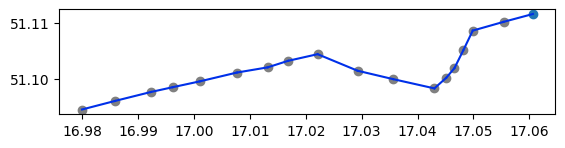

In [267]:
k = "FAT"
k1 = "PL. GRUNWALDZKI"

n = graph.graph[k]
n1 = graph.graph[k1]

graph.cost_estimation_scale = 1100
graph.hop_penalty=920
path, _, cost = graph.a_star(n, n1, gu.Timestamp.create_timestamp("12:00:00"), criteria='hops')


fig, ax = plt.subplots()
ax.set_aspect('equal')
node = n
cmap = plt.get_cmap('prism')
lines = {e.line: cmap(i) for i, e in enumerate(path)}
for edge in path:
    xs = (node.longitude, edge.dest.longitude)
    ys = (node.latitude, edge.dest.latitude)
    ax.plot(xs, ys, c=lines[edge.line])
    ax.scatter([node.longitude], [node.latitude], c='gray')
    node = edge.dest

ax.scatter([node.longitude], [node.latitude])
from zadanie_1 import print_detailed_solution
print_detailed_solution(path, n)

## Wybór skali dla kryterium przesiadkowego

In [146]:
graph.cost_estimation_scale = 1_100
results = {}

for i in range(100, 1500, 20):
    graph.hop_penalty = i
    results[i] = graph_benchmark_silent(graph.a_star, test_data, criteria='hops')   

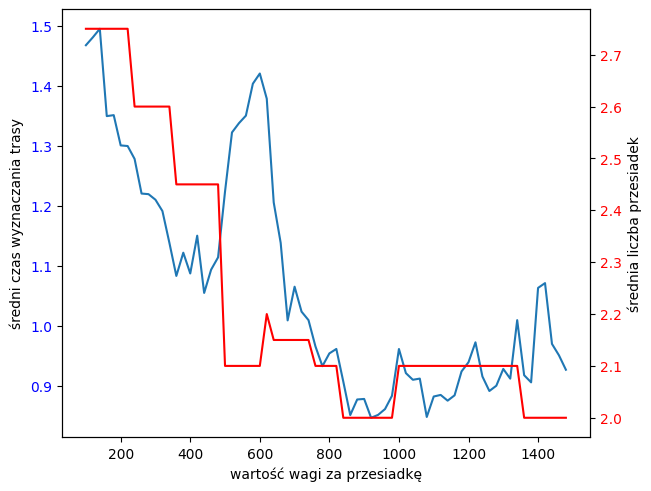

In [148]:
weight = []
avg_t = []
avg_cost = []
for k, v in results.items():
    weight.append(k)
    avg_t.append(v[1])
    avg_cost.append(v[2]/k)

fig, ax1 = plt.subplots(layout='constrained')
ax1.plot(weight, avg_t)
ax1.set_xlabel('wartość wagi za przesiadkę')
ax1.set_ylabel('średni czas wyznaczania trasy')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(weight, avg_cost, c='red')
ax2.set_ylabel('średnia liczba przesiadek')
ax2.tick_params(axis='y', labelcolor='red')

In [150]:
min([ (k, *v) for k, v in results.items() if 800<=k<1000], key=lambda x: x[1])


(920, 16.934004545211792, 0.8467002272605896, 1840.0)

In [ ]:
graph.hop_penalty = 920

## Testy kategoryzowane względem dystansu

In [19]:
test_data = get_test_data_between_distance(graph, 100, 0.01, 3)

In [ ]:
for i, (n1, n2, t) in enumerate(test_data):
    print(f"{i+1}. {n1.stop_name} -> {n2.stop_name} @ {t.time_str}")

In [159]:
graph_benchmark(graph.a_star, test_data)

RESULTS a_star cost graph.cost_estimation_scale
Total time: 10.4361
Mean time per route: 0.1044
Mean visited nodes: 21.6800
Mean path nodes: 6.2400
Failed: 5


In [161]:
results = []
for test in test_data:
    results.append(graph.a_star(*test))

In [178]:
graph_benchmark_silent(graph.a_star, test_data)

(12.210318088531494, 0.12210318088531494, 1690.8)

In [179]:
test_data = get_test_data_between_distance(graph, 100, 3, 7)
graph_benchmark(graph.a_star, test_data)
graph_benchmark_silent(graph.a_star, test_data)

RESULTS a_star cost graph.cost_estimation_scale
Total time: 21.6628
Mean time per route: 0.2166
Mean visited nodes: 39.5100
Mean path nodes: 12.0300
Failed: 7


(21.86694645881653, 0.21866946458816527, 2755.8)

In [181]:
test_data = get_test_data_between_distance(graph, 100, 7, float('inf'))
graph_benchmark(graph.a_star, test_data)
graph_benchmark_silent(graph.a_star, test_data)

RESULTS a_star cost graph.cost_estimation_scale
Total time: 61.8605
Mean time per route: 0.6186
Mean visited nodes: 69.8000
Mean path nodes: 25.9800
Failed: 14


(62.07624530792236, 0.6207624530792236, 4930.8)

In [182]:
for i, (n1, n2, t) in enumerate(test_data):
    print(f"{i+1}. {n1.stop_name} -> {n2.stop_name} @ {t.time_str}")


1. Graniczna (Strachowicka) -> Iwiny - rondo @ 11:29:00
2. Mroźna -> Lutynia - Straż @ 18:05:00
3. Uniwersytet Wrocławski -> Końcowa @ 21:11:00
4. Ołtaszyn -> Krzeptów - Dolina Krzeptowa @ 05:28:00
5. MULICKA -> Modlińska @ 17:42:00
6. Bierutowska -> Sołtysowicka @ 15:39:00
7. Żmigrodzka (Obwodnica) -> Wapienna @ 16:51:00
8. Opatowicka nr 59 -> Sąsiedzka @ 08:04:00
9. Magellana -> Kościuszki @ 21:28:00
10. Kowale (Stacja kolejowa) -> OSOBOWICE @ 12:04:00
11. KAMIEŃSKIEGO (pętla) -> Krępice @ 21:43:00
12. Pasikurowice - Wrocławska (na wys. nr 14) -> BRZEZINA (pętla) @ 14:05:00
13. Wielka -> Hartmana @ 06:24:00
14. Gądowianka -> Brzezinka Średzka - ul. Kolejowa @ 16:31:00
15. Sudecka -> Gądów @ 23:54:00
16. KLECINA (Stacja kolejowa) -> Brzezina - Zacisze @ 21:55:00
17. Wiśniowa -> Jarocińska @ 21:07:00
18. Marszowicka -> Broniewskiego @ 22:52:00
19. Świstackiego -> Psie Pole @ 20:48:00
20. Broniewskiego -> Sąsiedzka @ 16:02:00
21. ŚLAZOWA -> Czajkowskiego @ 08:04:00
22. Zielna -> Świdnic

## Poprawa heurestyki

In [16]:
test_data  = get_test_data(graph, 20)
results = {}
graph.cost_estimation_scale = 1_100
for i in np.arange(0.0, 1.1, 0.05):
    graph.hub_bonus = i
    results[i] = graph_benchmark_silent(graph.a_star, test_data, better_heurestic=True)

print(results)

{0.0: (1.4980363845825195, 0.07490181922912598, 4269.0), 0.05: (1.4009182453155518, 0.07004591226577758, 4293.0), 0.1: (1.4972617626190186, 0.07486308813095092, 4293.0), 0.15000000000000002: (1.6429541110992432, 0.08214770555496216, 4353.0), 0.2: (1.547257900238037, 0.07736289501190186, 4344.0), 0.25: (1.6412699222564697, 0.08206349611282349, 4368.0), 0.30000000000000004: (1.903047800064087, 0.09515239000320434, 4254.0), 0.35000000000000003: (2.297562599182129, 0.11487812995910644, 4260.0), 0.4: (2.5358810424804688, 0.12679405212402345, 4386.0), 0.45: (3.138706922531128, 0.1569353461265564, 4386.0), 0.5: (2.923011302947998, 0.1461505651473999, 4386.0), 0.55: (3.2819888591766357, 0.16409944295883178, 4362.0), 0.6000000000000001: (3.439998149871826, 0.17199990749359131, 4473.0), 0.65: (3.7950336933135986, 0.18975168466567993, 4497.0), 0.7000000000000001: (3.3949978351593018, 0.1697498917579651, 4581.0), 0.75: (3.2820019721984863, 0.1641000986099243, 4536.0), 0.8: (3.83896541595459, 0.191

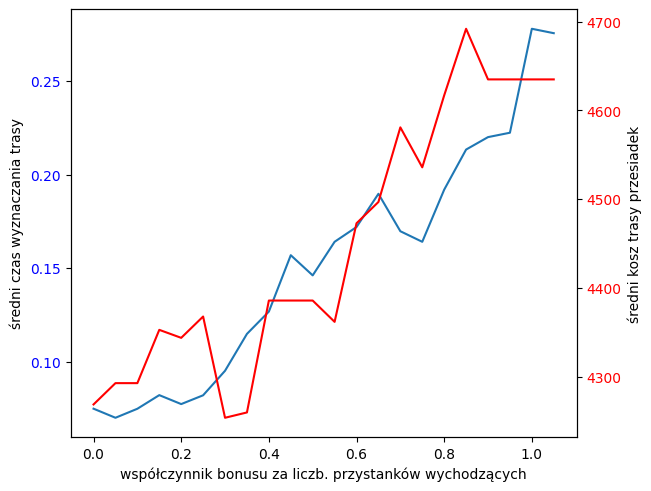

In [18]:
weight = []
avg_t = []
avg_cost = []
for k, v in results.items():
    weight.append(k)
    avg_t.append(v[1])
    avg_cost.append(v[2])

fig, ax1 = plt.subplots(layout='constrained')
ax1.plot(weight, avg_t)
ax1.set_xlabel('współczynnik bonusu za liczb. przystanków wychodzących')
ax1.set_ylabel('średni czas wyznaczania trasy')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(weight, avg_cost, c='red')
ax2.set_ylabel('średni kosz trasy przesiadek')
ax2.tick_params(axis='y', labelcolor='red')

In [21]:
graph.hub_bonus = 0.3
test_data = get_test_data_between_distance(graph, 100, 0.01, 3)
graph_benchmark(graph.a_star, test_data)
print(graph_benchmark_silent(graph.a_star, test_data))
print('---')
test_data_m = get_test_data_between_distance(graph, 100, 3, 7)
graph_benchmark(graph.a_star, test_data_m)
print(graph_benchmark_silent(graph.a_star, test_data_m))
print('---')
test_data_f = get_test_data_between_distance(graph, 100, 7, float('inf'))
graph_benchmark(graph.a_star, test_data_f)
print(graph_benchmark_silent(graph.a_star, test_data_f))
print('---')
print("better heurestic")
graph_benchmark(graph.a_star, test_data, better_heurestic=True)
print(graph_benchmark_silent(graph.a_star, test_data, better_heurestic=True))
print('---')
graph_benchmark(graph.a_star, test_data_m,  better_heurestic=True)
print(graph_benchmark_silent(graph.a_star, test_data_m, better_heurestic=True))
print('---')
graph_benchmark(graph.a_star, test_data_f, better_heurestic=True)
print(graph_benchmark_silent(graph.a_star, test_data_f, better_heurestic=True))
print('---')

RESULTS a_star cost graph.cost_estimation_scale
Total time: 7.1095
Mean time per route: 0.0711
Mean visited nodes: 21.4700
Mean path nodes: 6.1100
Failed: 4
(7.248066425323486, 0.07248066425323486, 1700.4)
---
RESULTS a_star cost graph.cost_estimation_scale
Total time: 19.7531
Mean time per route: 0.1975
Mean visited nodes: 47.7500
Mean path nodes: 13.5100
Failed: 2
(19.236031770706177, 0.19236031770706177, 3497.4)
---
RESULTS a_star cost graph.cost_estimation_scale
Total time: 41.4926
Mean time per route: 0.4149
Mean visited nodes: 66.2600
Mean path nodes: 27.8600
Failed: 10
(49.69139909744263, 0.4969139909744263, 5664.6)
---
better heurestic
RESULTS a_star cost graph.cost_estimation_scale
Total time: 10.6078
Mean time per route: 0.1061
Mean visited nodes: 26.6500
Mean path nodes: 6.2500
Failed: 4
(10.767833709716797, 0.10767833709716797, 1679.4)
---
RESULTS a_star cost graph.cost_estimation_scale
Total time: 27.3169
Mean time per route: 0.2732
Mean visited nodes: 55.7200
Mean path no

#  Tabu

In [185]:
import tabu as t 

In [210]:

k = "Brücknera"
n = graph.graph[k]
ns = [
    graph.graph["GALERIA DOMINIKAŃSKA"],
    graph.graph["PL. GRUNWALDZKI"],
    graph.graph["Kwidzyńska"],
    graph.graph["KARŁOWICE"],
    graph.graph["pl. Orląt Lwowskich"],
    graph.graph["pl. Bema"],
    graph.graph["Poczta Główna"],
    ]
t = tabu.Tabu(graph)
t.TABU_LEN = 5
t.OPERATION_LIMIT = 10
t.STEP_LIMIT = 20
path, solution, cost = t.tabu_search_v2(
    n,
    ns,
    gu.Timestamp.create_timestamp("9:00")
)

for s in solution:
    print(s.stop_name)
print(cost)

Brücknera
PL. GRUNWALDZKI
Poczta Główna
GALERIA DOMINIKAŃSKA
pl. Orląt Lwowskich
KARŁOWICE
pl. Bema
Kwidzyńska
Brücknera
4860


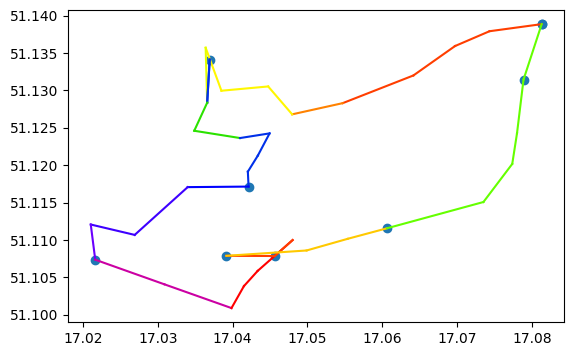

In [206]:
stops = [(node.latitude, node.longitude, node.stop_name) for node in solution]
latitudes, longitudes, stop_names = zip(*stops)

fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
ax.set_aspect('equal')
node = n
cmap = plt.get_cmap('prism')
lines = {e.line: cmap(i) for i, e in enumerate(path)}
for edge in path:
    xs = (node.longitude, edge.dest.longitude)
    ys = (node.latitude, edge.dest.latitude)
    ax.plot(xs, ys, c=lines[edge.line])
    node = edge.dest


In [270]:

k = "Brücknera"
n = graph.graph[k]
ns = [
    graph.graph["GALERIA DOMINIKAŃSKA"],
    graph.graph["PL. GRUNWALDZKI"],
    graph.graph["Kwidzyńska"],
    graph.graph["KARŁOWICE"],
    graph.graph["pl. Bema"],
    graph.graph["Rondo"],
    graph.graph["Uniwersytet Ekonomiczny"],
    graph.graph["Na Ostatnim Groszu"],
    graph.graph["FAT"],
    graph.graph["Poczta Główna"],
    graph.graph["rondo Św. Ojca Pio"],
    graph.graph["BLACHARSKA"],
    graph.graph["Aleja Pracy"],
    ]
t = tabu.Tabu(graph)
t.TABU_LEN = 12
t.OPERATION_LIMIT = 15
t.STEP_LIMIT = 30
path, solution, cost = t.tabu_search_v2(
    n,
    ns,
    gu.Timestamp.create_timestamp("9:00")
)

for s in solution:
    print(s.stop_name)
print(cost)

Brücknera
pl. Bema
KARŁOWICE
Na Ostatnim Groszu
Aleja Pracy
FAT
BLACHARSKA
rondo Św. Ojca Pio
Uniwersytet Ekonomiczny
Rondo
GALERIA DOMINIKAŃSKA
PL. GRUNWALDZKI
Poczta Główna
Kwidzyńska
Brücknera
10500


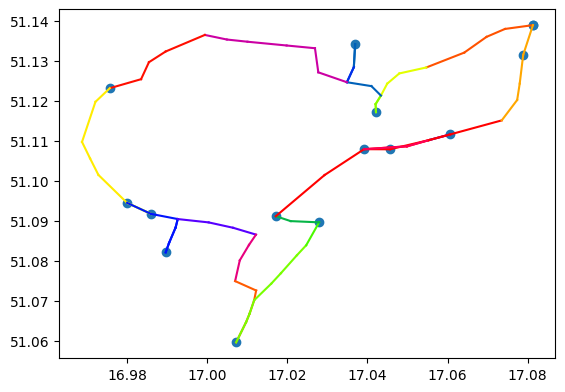

In [271]:
stops = [(node.latitude, node.longitude, node.stop_name) for node in solution]
latitudes, longitudes, stop_names = zip(*stops)

fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
ax.set_aspect('equal')
node = n
cmap = plt.get_cmap('prism')
lines = {e.line: cmap(i) for i, e in enumerate(path)}
for edge in path:
    xs = (node.longitude, edge.dest.longitude)
    ys = (node.latitude, edge.dest.latitude)
    ax.plot(xs, ys, c=lines[edge.line])
    node = edge.dest